In [1]:
import sys
sys.path.append(r'..//')
from ioMicro import *

### Pick a few FOVs for reference

In [ ]:
scoresRef = None

Loaded decoded: -32.126585721969604


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:34<00:00,  1.40it/s]


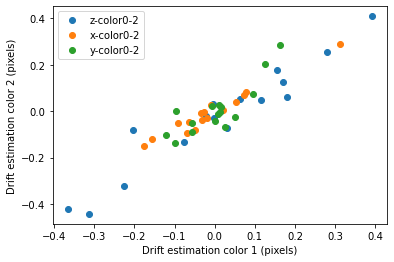

In [2]:
save_folder =r'\\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12'
fov,set_ = 'Conv_zscan__040', '_D16' ################## Change 
dec = decoder_simple(save_folder,fov,set_)
dec.ncols = 3
dec.load_decoded()
apply_fine_drift(dec,plt_val=True)
apply_flat_field(dec,tag='med_col_raw')

In [42]:
scoresRefT = get_score_per_color(dec)

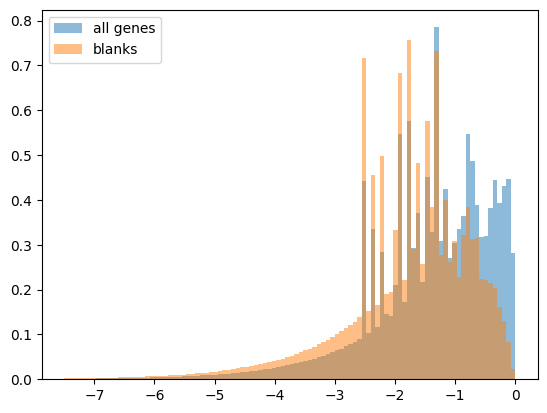

In [43]:
get_score_withRef(dec,scoresRefT,plt_val=True,gene=None,iSs = None,th_min=-7.5)

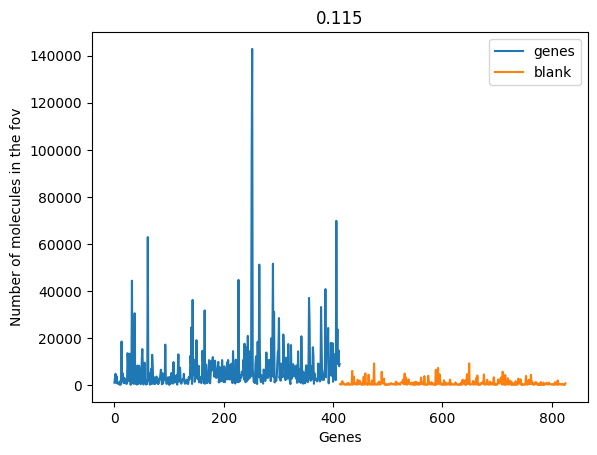

In [44]:
dec.th=-0.5
plot_statistics(dec)

In [37]:
#??plot_statistics

In [45]:
icds,ncds = np.unique(dec.icodesN[dec.scoreA>dec.th],return_counts=True)
dec.gns_names[icds[np.argsort(ncds)[::-1]]][:150]

array(['Dpysl3', 'Dpysl2', 'Elavl3', 'Cd24a', 'Agt', 'Enc1', 'Csdc2',
       'Bcl11b', 'Ddx5', 'Cnr1', 'Actg1', 'Cux2', 'Auts2', 'Ank2',
       'Bhlhe22', 'Ascl1', 'Cntf', 'Acsl3', 'Dlg4', 'Elfn1', 'Bsg', 'Dcx',
       'Cdh2', 'Adcy1', 'Aif1l', 'Cxcl10', 'Ankrd11', 'Eif4a2', 'Drd1',
       'Dsp', 'Cttnbp2', 'Camk4', 'Adgrl3', 'Cplx2', 'Casp3', 'Col19a1',
       'Dcc', 'Cck', 'Dgat2', 'Arx', 'Eno1', 'Erbb4', 'Atp2b4', 'Dgkh',
       'Chrna6', 'Dlgap5', 'Cd38', 'Elavl4', 'Aqp8', 'Fam107a', 'Bsn',
       'Arpp21', 'Baiap3', 'Egfem1', 'Dlx6os1', 'Cdk4', 'Dbpht2',
       'Col1a1', '6330403K07Rik', 'Dgkb', 'Ednrb', 'Cadps2', 'C1ql2',
       'Dlx2', 'Cbx5', 'Ckap5', 'A930003A15Rik', 'Ctsl', 'Adora2a',
       'Chek1', '1810041L15Rik', 'Cd81', 'C1qtnf4', 'Camk2a', 'Cabs1',
       'Cacnb2', 'Ccp110', 'Dact1', 'Cenpu', 'Aqp2', 'Ccnd2', 'Atxn1',
       'blank0236', 'blank0062', 'Crispld2', 'Camk2d', 'BC030343',
       'Chrdl1', 'Abi3bp', 'Ecel1', 'Dll1', 'Adcyap1', 'Fam184a',
       'Atp1b1', 'Cbl

In [47]:
viewer = plot_multigenes(dec,genes=['Cd24a','Ascl1','Arx'],colors=['r','g','b','m','c','y','w'],viewer = None,
                         smin=2,smax=20)

In [48]:
if True:
    if scoresRef is None: scoresRef=scoresRefT
    else: combine_scoresRef(scoresRef,scoresRefT)
    pickle.dump(scoresRef,open(save_folder+os.sep+'scoresRef.npy','wb'))

# START HERE: Use the reference to threshold and pull the FOVs

In [2]:
import sys
sys.path.append(r'..//')
from ioMicro import *

### Load the segmentat|ion for an entire section (i.e. _D16)

In [3]:
dic_ = np.load(r'\\192.168.0.6\bbfishjoy4extra\SegmentationCyto2\imfsegm.npz')################
imfsegm = dic_['imfsegm']
coordsf=dic_['coordsf']
resc = dic_['resc']
dic = np.load(r'\\192.168.0.6\bbfishjoy4extra\SegmentationCyto2\pos_um_fovs.npz')##################
pos=dic['pos']
fls=dic['fls']
fovs = [os.path.basename(fl).split('--')[0]for fl in fls]
set_ = '_'+os.path.basename(fls[0]).split('--')[1].split('_')[-1]

In [3]:

#set_

In [4]:
save_folders = [r'\\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12',
                r'\\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP34',
                r'\\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1',
                r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\MERFISH_AnalysisP56',
                r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\MERFISH_AnalysisP711',
                r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\MERFISH_AnalysisE2']
for fld in save_folders:
    print(os.path.exists(fld))

True
True
True
True
True
True


### Itterate through each fov in section (set i.e. _D16)

In [5]:
paramaters = [(fov,set_,save_folder)for fov in fovs for save_folder in save_folders]
len(paramaters)

1554

In [18]:
fov,set_,save_folder = paramaters[100]

fov = 'Conv_zscan__059'
print(fov,set_,save_folder)

Conv_zscan__059 _D16 \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\MERFISH_AnalysisP711


Loaded decoded: -18.705095291137695


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:21<00:00,  2.23it/s]


Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP711--Conv_zscan__059--_D16.npz


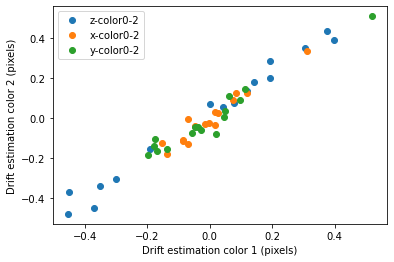

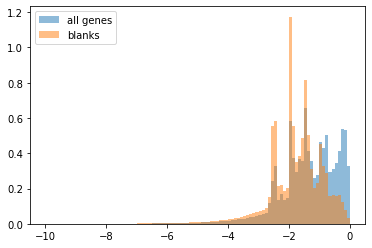

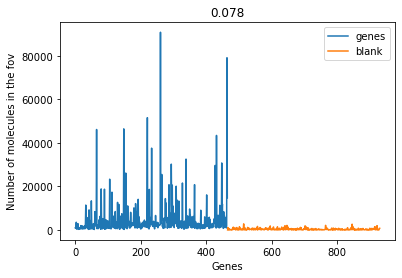

In [19]:
main_analysisV1(fov,set_,
                   save_folder = save_folder,
                   save_fl_ref = r'\\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12\scoresRef.npy',
                   save_folder_all = r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots',
                   drift_folder = r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\DriftAcrossDatasets',
                   segm_tag = 'A1_LamA_Nup98_D16')

Loaded decoded: -16.548757076263428


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:20<00:00,  2.30it/s]


Finished \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP34--Conv_zscan__000--_D16.npz


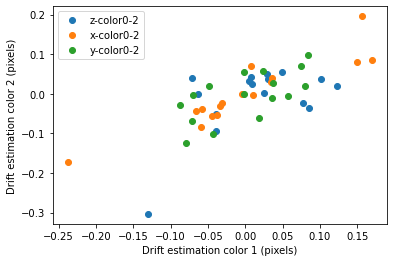

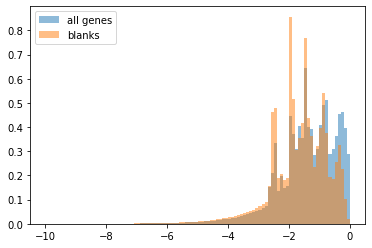

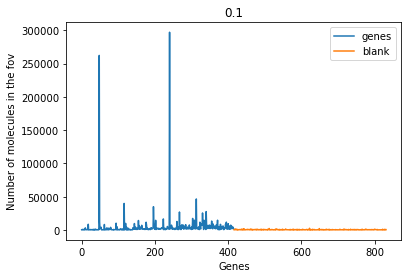

In [12]:
fov,set_,save_folder='Conv_zscan__000', '_D16',r'\\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP34'
main_analysisV1(fov,set_,
                       save_folder = save_folder,
                       save_fl_ref = r'\\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12\scoresRef.npy',
                       save_folder_all = r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots',
                       drift_folder = r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\DriftAcrossDatasets',
                       segm_tag = 'A1_LamA_Nup98_D16')

  4%|███▎                                                                           | 64/1554 [00:00<00:05, 285.68it/s]

Failed at: Conv_zscan__010 _D16 \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\MERFISH_AnalysisP56
Loaded decoded: -1.307753324508667



  6%|████▊                                                                           | 93/1554 [00:03<01:12, 20.28it/s]

Failed at: Conv_zscan__013 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP34
Loaded decoded: -0.20067954063415527



 12%|█████████▏                                                                     | 180/1554 [00:04<00:24, 55.37it/s]

Failed at: Conv_zscan__019 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Failed at: Conv_zscan__030 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1


 14%|██████████▋                                                                    | 211/1554 [00:04<00:19, 69.95it/s]

Failed at: Conv_zscan__033 _D16 \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\MERFISH_AnalysisP56
Failed at: Conv_zscan__043 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1


 24%|██████████████████▋                                                           | 372/1554 [00:04<00:06, 179.05it/s]

Failed at: Conv_zscan__053 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__061 _D16 \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\MERFISH_AnalysisE2
Loaded decoded: -10.499979257583618



 28%|█████████████████████▊                                                         | 429/1554 [00:40<04:04,  4.61it/s]

Failed at: Conv_zscan__071 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1


 28%|██████████████████████                                                         | 435/1554 [00:41<04:06,  4.54it/s]

Failed at: Conv_zscan__072 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__073 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -10.173639297485352



 29%|██████████████████████▋                                                        | 447/1554 [01:00<07:08,  2.58it/s]

Failed at: Conv_zscan__074 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__075 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1


 30%|███████████████████████▎                                                       | 459/1554 [01:00<06:04,  3.00it/s]

Failed at: Conv_zscan__076 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__077 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__078 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1


 31%|████████████████████████▏                                                      | 477/1554 [01:01<04:40,  3.84it/s]

Failed at: Conv_zscan__079 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1


 32%|████████████████████████▉                                                      | 491/1554 [01:01<03:44,  4.74it/s]

Failed at: Conv_zscan__080 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__081 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__082 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1


 34%|██████████████████████████▋                                                    | 524/1554 [01:02<01:59,  8.63it/s]

Failed at: Conv_zscan__083 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__084 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__085 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__086 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__087 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__088 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__089 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__090 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1


 38%|█████████████████████████████▋                                                 | 585/1554 [01:02<00:43, 22.52it/s]

Failed at: Conv_zscan__091 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__092 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__093 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__094 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__095 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__096 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__097 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__098 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__099 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1


 43%|█████████████████████████████████▊                                             | 666/1554 [01:02<00:15, 55.79it/s]

Failed at: Conv_zscan__100 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__101 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__102 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__103 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__104 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__105 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__106 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__107 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__108 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__109 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__110 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__111 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__112 _

 45%|███████████████████████████████████▍                                           | 697/1554 [01:03<00:12, 70.17it/s]

Failed at: Conv_zscan__112 _D16 \\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\MERFISH_AnalysisE2
Failed at: Conv_zscan__113 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__114 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__115 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__116 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__117 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__118 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__119 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1


 49%|██████████████████████████████████████                                        | 759/1554 [01:03<00:06, 114.20it/s]

Failed at: Conv_zscan__120 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__121 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__122 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__123 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__124 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__125 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__126 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__127 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__128 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1


 51%|███████████████████████████████████████▌                                      | 788/1554 [01:03<00:06, 122.86it/s]

Failed at: Conv_zscan__129 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__130 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__131 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__132 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__133 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__134 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Loaded decoded: -0.25127744674682617



 54%|██████████████████████████████████████████▌                                    | 837/1554 [01:04<00:09, 72.90it/s]

Failed at: Conv_zscan__135 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Failed at: Conv_zscan__135 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__136 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__137 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__138 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__139 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1


 57%|████████████████████████████████████████████▋                                 | 891/1554 [01:04<00:06, 110.28it/s]

Failed at: Conv_zscan__140 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__141 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__142 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__143 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__144 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__145 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__146 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__147 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__148 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1


 60%|██████████████████████████████████████████████▊                               | 933/1554 [01:05<00:04, 145.46it/s]

Failed at: Conv_zscan__149 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__150 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__151 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__152 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__153 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__154 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__155 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__156 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__157 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1


 65%|██████████████████████████████████████████████████                           | 1011/1554 [01:05<00:02, 225.54it/s]

Failed at: Conv_zscan__158 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__159 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__160 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__161 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__162 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__163 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__164 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__165 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__166 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__167 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__168 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__169 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1


 67%|███████████████████████████████████████████████████▉                         | 1047/1554 [01:05<00:02, 232.31it/s]

Failed at: Conv_zscan__170 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__171 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__172 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__173 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__174 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__175 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__176 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__177 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1


 70%|█████████████████████████████████████████████████████▌                       | 1081/1554 [01:05<00:02, 228.50it/s]

Failed at: Conv_zscan__178 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__179 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__180 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Failed at: Conv_zscan__180 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__181 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Failed at: Conv_zscan__181 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1


 71%|██████████████████████████████████████████████████████▉                      | 1108/1554 [01:05<00:02, 180.45it/s]

Failed at: Conv_zscan__182 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Failed at: Conv_zscan__182 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__183 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Failed at: Conv_zscan__183 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__184 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Failed at: Conv_zscan__184 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__185 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Failed at: Conv_zscan__185 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: 

 73%|███████████████████████████████████████████████████████▉                     | 1130/1554 [01:06<00:02, 146.33it/s]

Conv_zscan__186 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Failed at: Conv_zscan__186 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__187 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Failed at: Conv_zscan__187 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__188 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Failed at: Conv_zscan__188 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__189 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Failed at: Conv_zscan__189 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1


 74%|████████████████████████████████████████████████████████▉                    | 1148/1554 [01:06<00:02, 137.26it/s]

Failed at: Conv_zscan__190 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Failed at: Conv_zscan__190 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__191 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Failed at: Conv_zscan__191 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__192 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Failed at: Conv_zscan__192 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__193 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12


 75%|█████████████████████████████████████████████████████████▋                   | 1164/1554 [01:06<00:03, 127.75it/s]

Failed at: Conv_zscan__193 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__194 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Failed at: Conv_zscan__194 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1


 78%|████████████████████████████████████████████████████████████▎                | 1216/1554 [01:06<00:02, 137.88it/s]

Failed at: Conv_zscan__195 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12
Failed at: Conv_zscan__195 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__196 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__197 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__198 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__199 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__200 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__201 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__202 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__203 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__204 _D16 

 83%|███████████████████████████████████████████████████████████████▋             | 1286/1554 [01:06<00:01, 214.69it/s]

\\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__205 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__206 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__207 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__208 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1
Failed at: Conv_zscan__215 _D16 \\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisE1


100%|██████████████████████████████████████████████████████████████████████████████| 1554/1554 [01:07<00:00, 23.07it/s]


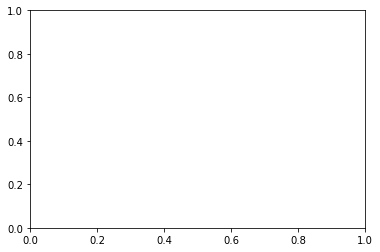

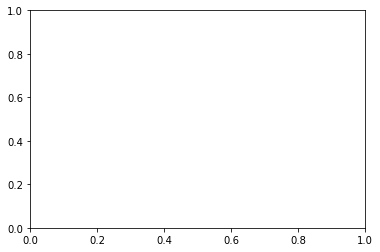

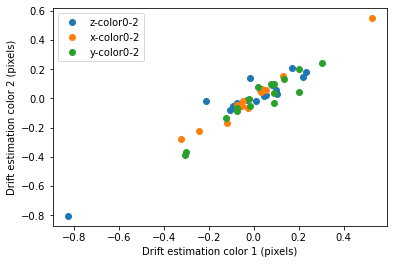

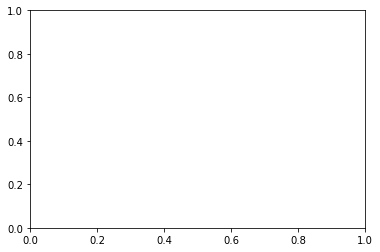

In [8]:
for fov,set_,save_folder in tqdm(paramaters):
    try:
        main_analysisV1(fov,set_,
                       save_folder = save_folder,
                       save_fl_ref = r'\\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12\scoresRef.npy',
                       save_folder_all = r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots',
                       drift_folder = r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\DriftAcrossDatasets',
                       segm_tag = 'A1_LamA_Nup98_D16')
    except:
        print("Failed at:",fov,set_,save_folder)

In [6]:
def apply_flat_field(dec,tag=r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\DriftAcrossDatasets\med_col_raw'):
    ### load the immeds
    Icol = dec.XH_pruned[:,:,-2].astype(int)
    uIcols = np.unique(Icol)
    dec.ncols = len(uIcols)
    #save_folder=dec.save_folder#r'\\192.168.0.10\bbfishdc13\DCBBL1_3_2_2023\MERFISH_Analysis'
    immeds = []
    for icol in range(dec.ncols):
        fl_med = tag+str(icol)+'.npz'
        if not os.path.exists(fl_med):
            fl_med = fl_med.replace('_raw','')
        dic = np.load(fl_med)
        immed,resc=dic['im'],dic['resc']
        immeds.append(immed)
    dec.immeds = np.array(immeds)
    dec.resc = resc
    
    ### renormalize the brightness according to flatfield
    XH = dec.XH_pruned
    Icol = XH[:,:,-2].astype(int)
    H = dec.XH_pruned[:,:,-3].copy()
    for icol in range(dec.ncols):
        keep = Icol==icol
        immed = dec.immeds[icol].copy()
        immed = immed/np.median(immed)
        x_,y_ = ((XH[keep][:,1:3]/dec.resc).astype(int)%immed.shape).T
        norm_ = immed[x_,y_] 
        H[keep]=H[keep]/norm_
    dec.XH_pruned[:,:,-3] = H


def main_analysisV1(fov,set_,
                   save_folder = r'\\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12',
                   save_fl_ref = r'\\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP12\scoresRef.npy',
                   save_folder_all = r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots',
                   drift_folder = r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\DriftAcrossDatasets',
                   segm_tag = 'A1_LamA_Nup98_D16',redo=False):


    if not os.path.exists(save_folder_all): os.makedirs(save_folder_all)
    save_fl = save_folder_all+os.sep+'saveDecodedFinalV1--'+os.path.basename(save_folder)+'--'+fov.split('.')[0]+'--'+set_+'.npz'

    if not os.path.exists(save_fl) or redo:
        ####### Load in the decoded spot data #############################
        #fov,set_ = 'Conv_zscan__040', '_D16' ################## Change 
        dec = decoder_simple(save_folder,fov,set_)
        dec.ncols = 3
        dec.load_decoded()
        apply_fine_drift(dec,plt_val=True)
        apply_flat_field(dec)
        #scoresRefT = get_score_per_color(dec)
        scoresRef = np.load(save_fl_ref,allow_pickle=True)
        get_score_withRef(dec,scoresRef,plt_val=True,gene=None,iSs = None,th_min=-10)
        dec.th=-0.5
        plot_statistics(dec)

        ####### Threhold the decoded spot data #############################
        keepf =  dec.scoreA>dec.th ### keep good score
        icodesf = dec.icodesN[keepf]
        XHfpr = dec.XH_pruned[keepf]

        ### Reorganize data  ###############################
        XHf = np.mean(XHfpr,axis=1)
        XF = XHf[:,[0,1,2,-5,-4,-3,-2,-1,-1,-1,-1]]
        #zc,xc,yc,bk-7,a-6,habs-5,hn-4,h-3
        XF[:,-1] = dec.scoreA[keepf]
        XF[:,-2] = np.where(keepf)[0]
        mnD = np.mean(np.linalg.norm((XHf[:,np.newaxis]-XHfpr)[:,:,:3],axis=-1),axis=-1)
        XF[:,-3]=mnD
        mnH = np.mean(np.abs((XHf[:,np.newaxis]-XHfpr)[:,:,-3]),axis=-1)
        XF[:,-4]=mnH
        genesf = dec.gns_names[icodesf]

        ### Apply drift to match the segmentation reference ########################
        def get_drft_dic(fl_all_drift):
            drft,flds,fov_,fl_ref= np.load(fl_all_drift,allow_pickle=True)
            return {('--'.join(fld.split(os.sep)[-2:]) if '--' in os.path.basename(fld) else os.path.basename(fld)):drft_[0] 
                    for fld,drft_ in zip(flds,drft)}

        fl_all_drift = drift_folder+os.sep+'driftNew_'+dec.fov+'--'+dec.set_+'.pkl'
        drft_dic_all = get_drft_dic(fl_all_drift)
        fl_all_drift = save_folder+os.sep+'driftNew_'+dec.fov+'--'+dec.set_+'.pkl'
        drft_dic_group = get_drft_dic(fl_all_drift)
        key_segm = [key for key in drft_dic_all if segm_tag in key][0]
        key_align = np.intersect1d(list(drft_dic_all.keys()),list(drft_dic_group.keys()))[0]
        th1_to_h0 = drft_dic_all[key_segm]-drft_dic_all[key_align]
        th1_gr = drft_dic_group[key_align]
        tzxyf = th1_gr+th1_to_h0

        XF[:,:3]=XF[:,:3]-tzxyf #### do not add here

        ### Load in the current fov segmentation ######################################
        ifov = fovs.index(dec.fov)
        coords= coordsf[ifov]
        dec.im_segm_ = imfsegm[:,coords[0]:coords[1],coords[2]:coords[3]]

        #### get cell ids #######################
        def get_cell_id(dec,Xh,resc=[2,2,2],plot_val = False):
            if not hasattr(dec,'im_segm_'): 
                good = np.ones(len(Xh),dtype=bool)
                cells_ = np.zeros(len(Xh),dtype=int)
                return cells_,good
            im_segm = dec.im_segm_
            dec.shapesm = dec.im_segm_.shape
            Xcms = Xh[:,:3]
            Xred = np.round(Xcms/resc).astype(int)
            good = ~np.any((Xred>=dec.shapesm)|(Xred<0),axis=-1)
            Xred = Xred[good]
            if plot_val:
                v = napari.view_points(Xred,size=1.5)
                v.add_labels(im_segm)
            return im_segm[tuple(Xred.T)],good


        cell_id,good =get_cell_id(dec,XF,resc=[2,2,2],plot_val = False)
        #XF_ = np.concatenate([XF[good],cell_id[:,np.newaxis]],axis=-1)
        genesf_ = genesf[good]
        iset = int(dec.set_.split('_D')[-1])
        ifov = int(dec.fov.split('_')[-1].split('.')[0])
        isets = np.array([iset]*len(cell_id))[:,np.newaxis]
        ifovs = np.array([ifov]*len(cell_id))[:,np.newaxis]
        cell_id = cell_id[:,np.newaxis]
        XF_ = np.concatenate([XF[good],cell_id,ifovs,isets],axis=-1)

        #get_xyfov(dec)
        ### add absolute positiuons of molecules in um
        pixel_size = np.array([0.4,0.10833,0.10833])*resc
        XF_ = XF_[:,list(np.arange(XF_.shape[-1]))+[-1,-1,-1]]
        XF_[:,-3:]=((XF_[:,:3]/resc)+[0,coords[0],coords[2]])*pixel_size
        header = ['z','x','y','abs_brightness','cor','brightness','color','mean_bightness_variation','mean_distance_variation',
                  'index_from_XH_pruned','score','cell_id','ifov','iset','z_um_abs','x_um_abs','y_um_abs']


        ##### get info for cells #########################
        if not hasattr(dec,'im_segm_'): dec.im_segm_=np.zeros(np.array([30,3000,3000])//2)
        icells,vols = np.unique(dec.im_segm_,return_counts=True)
        cms = np.array(ndimage.center_of_mass(np.ones_like(dec.im_segm_),dec.im_segm_,icells))
        #icells,vols = np.unique(dec.im_segm_,return_counts=True)
        cms = np.array(ndimage.center_of_mass(np.ones_like(dec.im_segm_),dec.im_segm_,icells))

        cells_abs_pos = (cms+[0,coords[0],coords[2]])*pixel_size

        cellinfo = cms[:,[0,0,0,1,2,0,0,0]]
        cellinfo[:,0]=icells
        cellinfo[:,1]=vols
        cellinfo[:,-3:]=cells_abs_pos

        header_cells = ['cell_id','volm','zc','xc','yc','z_um_abs','x_um_abs','y_um_abs']
        plt.close('all')

        if True:
            np.savez_compressed(save_fl,XF=XF_.astype(np.float32),
                                genes = genesf_,cellinfo=cellinfo.astype(np.float32),header_cells=header_cells,header=header)
        print("Finished",save_fl)

In [13]:
plt.close('all')

Finished Conv_zscan__040


In [62]:
800*6*100

480000

In [59]:
print(save_fl)

\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots\saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__040--_D16.npz


In [51]:
print(drift_folder)

\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\DriftAcrossDatasets


In [52]:
final_folder_dec = r'\\192.168.0.7\bbfishmahsa3\CGBB_embryo_4_28_2023\FinalDecodedSpots'
os.makedirs()

In [ ]:
os.se

In [37]:
ifov = int(dec.fov.split('_')[-1].split('.')[0])
ifov

40

In [20]:
im_segm

In [24]:
dec.XH_pruned.shape

(23433393, 4, 10)

In [28]:
resc

array([2, 2, 2])

In [57]:
save_fl = 'saveDecodedFinalV1--'+os.path.basename(dec.save_folder)+'--'+dec.fov.split('.')[0]+'--'+dec.set_+'.npz'

'saveDecodedFinalV1--MERFISH_AnalysisP12--Conv_zscan__040--_D16.npz'

In [54]:
os.path.basename(dec.save_folder)

'MERFISH_AnalysisP12'

In [ ]:
def main_analysis(fov,scoresRef=scoresRef,force=force):
    if type(scoresRef) is str: scoresRef = np.load(scoresRef,allow_pickle=True)
    save_fl = save_folder_all+os.sep+os.sep+tag_save+fov.split('.')[0]+'--'+set_+'.npz'
    if not os.path.exists(save_fl) or force:

        if not os.path.exists(save_folder_all): os.makedirs(save_folder_all)


        ### Load point data ###############################
        all_gns_names = []
        XFF,genesFF = None,None
        for isave,save_folder in enumerate(save_folders):
            #save_folder = save_folders[0]
            dec = decoder_simple(save_folder,fov,set_)
            loaded = dec.load_decoded()
            if not loaded:
                print(save_fl, "Did not have a valid decoded file.")
                #return None
            dec.gns_names = np.array([gn+'_'+str(isave) if gn in all_gns_names else gn for gn in dec.gns_names])
            all_gns_names = np.unique(np.concatenate([all_gns_names,dec.gns_names]))

            ### Threshold point data ###############################
            dec.ncols=ncols
            get_score_withRef(dec,scoresRef,plt_val=plt_val,gene=None,iSs = None)
            dec.th=th
            if plt_val:
                plot_statistics(dec)
            #print(dec.gns_ordered)



            keepf =  dec.scoreA>dec.th ### keep good score
            icodesf = dec.icodesN[keepf]
            XHfpr = dec.XH_pruned[keepf]

            ### Reorganize data  ###############################
            XHf = np.mean(XHfpr,axis=1)
            XF = XHf[:,[0,1,2,-5,-4,-3,-2,-1,-1,-1,-1]]
            #zc,xc,yc,bk-7,a-6,habs-5,hn-4,h-3
            XF[:,-1] = dec.scoreA[keepf]
            XF[:,-2] = np.where(keepf)[0]
            mnD = np.mean(np.linalg.norm((XHf[:,np.newaxis]-XHfpr)[:,:,:3],axis=-1),axis=-1)
            XF[:,-3]=mnD
            mnH = np.mean(np.abs((XHf[:,np.newaxis]-XHfpr)[:,:,-3]),axis=-1)
            XF[:,-4]=mnH
            genesf = dec.gns_names[icodesf]

            ### Load and apply drift correction
            def get_drft_dic(fl_all_drift):
                drft,flds,fov_,fl_ref= np.load(fl_all_drift,allow_pickle=True)
                return {'--'.join(fld.split(os.sep)[-2:]):drft_[0] for fld,drft_ in zip(flds,drft)}
            fl_all_drift = drift_folder+os.sep+'driftNew_'+fov+'--'+set_+'.pkl'
            drft_dic_all = get_drft_dic(fl_all_drift)
            fl_all_drift = save_folder+os.sep+'driftNew_'+fov+'--'+set_+'.pkl'
            drft_dic_group = get_drft_dic(fl_all_drift)
            key_segm = [key for key in drft_dic_all if segm_tag in key][0]
            key_align = np.intersect1d(list(drft_dic_all.keys()),list(drft_dic_group.keys()))[0]
            th1_to_h0 = drft_dic_all[key_segm]-drft_dic_all[key_align]
            th1_gr = drft_dic_group[key_align]
            tzxyf = th1_gr+th1_to_h0
            XF[:,:3]=XF[:,:3]-tzxyf #### do not add here
            
            
            ### Load dapi
            if True:
                dec.fl_dapi = segm_folder+os.sep+fov+'--'+segm_tag+set_+'--dapi_segm.npz'
                dic = np.load(dec.fl_dapi)
                im_segm = dic['segm']
                dec.shape = dic['shape']
                dec.im_segm_=stitch3d_new(im_segm,minsz = 200,maxsz = 1000,th_int=0.66,th_cover=0.8,th_max_subcell=0.66,nexpand = 5)
                dec.shapesm = np.array(dec.im_segm_.shape)
            else:
                dec.fl_dapi = segm_folder+os.sep+'allCells--'+set_+'.zarr'
                full_im_segm = da.from_zarr(dec.fl_dapi)
                dic_info = np.load(dec.fl_dapi.replace('.zarr','.npz'))
                #fovs = fovs,xys=xys,xs_pix=xs_pix,ys_pix=ys_pix,sxy_pixsz=[sx,sy,um_per_pix],shape=shape,shapesm=im_segm.shape)
                xs_pix,ys_pix=dic_info['xs_pix'],dic_info['ys_pix']
                fovs,dec.shape=dic_info['fovs'],dic_info['shape']
                sx,sy,um_per_pix = dic_info['sxy_pixsz']
                ifv_ = list(fovs).index(fov)
                x_,y_ = xs_pix[ifv_],ys_pix[ifv_]
                dec.shapesm = np.array([len(full_im_segm),sx,sy])
                ### incomplete here
                np.min(XF[:,:3],axis=0)
                
                tz,tx,ty = np.round(tzxyf/dec.shape*dec.shapesm).astype(int)
                
                dec.im_segm_= np.array(full_im_segm[...,x_+tx:x_+sx+tx,y_+ty:y_+sy+ty])
            
            if XFF is None:
                XFF,genesFF = XF,genesf
            else:
                XFF,genesFF = np.concatenate([XFF,XF]),np.concatenate([genesFF,genesf])



        def get_cell_id(dec,Xh):
            if not hasattr(dec,'im_segm_'): 
                good = np.ones(len(Xh),dtype=bool)
                cells_ = np.zeros(len(Xh),dtype=int)
                return cells_,good
            im_segm = dec.im_segm_
            dec.shapesm = dec.im_segm_.shape
            Xcms = Xh[:,:3]
            Xred = np.round((Xcms/dec.shape)*dec.shapesm).astype(int)
            good = ~np.any((Xred>=dec.shapesm)|(Xred<0),axis=-1)
            Xred = Xred[good]
            if True:
                v = napari.view_points(Xred,opacity=0.1,size=1.5)
                v.add_labels(im_segm)
            return im_segm[tuple(Xred.T)],good

        XF,genesf = XFF,genesFF  
        cell_id,good = get_cell_id(dec,XF)
        XF_ = np.concatenate([XF[good],cell_id[:,np.newaxis]],axis=-1)
        genesf_ = genesf[good]
        iset = int(dec.set_.split('_set')[-1])
        ifov = int(dec.fov.split('_')[-1].split('.')[0])
        isets = np.array([iset]*len(cell_id))[:,np.newaxis]
        ifovs = np.array([ifov]*len(cell_id))[:,np.newaxis]
        cell_id = cell_id[:,np.newaxis]
        XF_ = np.concatenate([XF[good],cell_id,ifovs,isets],axis=-1)

        get_xyfov(dec)
        XF_ = XF_[:,list(np.arange(XF_.shape[-1]))+[-1,-1]]
        XF_[:,-2:]=dec.xfov,dec.yfov
        header = ['z','x','y','abs_brightness','cor','brightness','color','mean_bightness_variation','mean_distance_variation',
                  'index_from_XH_pruned','score','cell_id','ifov','iset','xfov','yfov']

        if not hasattr(dec,'im_segm_'): dec.im_segm_=np.zeros(np.array([30,3000,3000])//4)
        icells,vols = np.unique(dec.im_segm_,return_counts=True)
        cms = np.array(ndimage.center_of_mass(np.ones_like(dec.im_segm_),dec.im_segm_,icells))
        #icells,vols = np.unique(dec.im_segm_,return_counts=True)
        cms = np.array(ndimage.center_of_mass(np.ones_like(dec.im_segm_),dec.im_segm_,icells))
        cellinfo = cms[:,[0,0,0,1,2,0,0]]
        cellinfo[:,0]=icells
        cellinfo[:,1]=vols
        cellinfo[:,-2:]=dec.xfov,dec.yfov
        header_cells = ['cell_id','volm','zc','xc','yc','xfov','yfov']
        if True:
            np.savez_compressed(save_fl,XF=XF_.astype(np.float32),
                                genes = genesf_,cellinfo=cellinfo.astype(np.float32),header_cells=header_cells,header=header)
        print("Finished",fov)
        

In [23]:
tzxyf

array([  -3.29521794, -433.87942907,  -51.25487467])

In [14]:
import napari
napari.view_labels(im_segm)

Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(0.0, 724.5, 724.5), zoom=0.3498620689655172, angles=(0.0, 0.0, 90.0), perspective=0.0, interactive=True), cursor=Cursor(position=(1.0, 1.0, 0.0), scaled=True, size=10, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=3, ndisplay=2, last_used=0, range=((0.0, 15.0, 1.0), (0.0, 1450.0, 1.0), (0.0, 1450.0, 1.0)), current_step=(7, 725, 725), order=(0, 1, 2), axis_labels=('0', '1', '2')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Labels layer 'im_segm' at 0x24f7f9d1bb0>], scale_bar=ScaleBar(visible=False, colored=False, ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10, unit=None), text_overlay=TextOverlay(visible=False, color=(0.5, 0.5, 0.5, 1.0), font_size=10, position=<TextOverlayPosition.TOP_LEFT: 'top_left'>, text=''), overlays=Overlays(interaction_box=InteractionBox(points=None, show=False, show_handle=False, show_vertic